In [1]:
from transformers import pipeline
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
from transformers import LongformerTokenizer, LongformerForSequenceClassification, EncoderDecoderModel, LongformerConfig, LongformerTokenizerFast
import numpy as np
import matplotlib.pyplot as plt


/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting up Dataset

In [35]:
file_path= "../datasets/2022_tokyo_activities.csv"
column_name= "text"

df= pd.read_csv(file_path)

print(len(df))
print(df.columns.values.tolist())

if len(df)>1000:
    tweets_subset = df.head(1000)
    tweets= tweets_subset[column_name].tolist()
else:
    tweets= df[column_name].tolist()

X_train= [str(value) for value in tweets]


751
['author_id', 'geo', 'lang', 'created_at', 'entities', 'id', 'edit_history_tweet_ids', 'text', 'context_annotations', 'withheld']


## Setting up the Topic Classification Model

In [6]:
topics= ['Walking', 'Fishing', 'Photography', 'Hiking', 'Children', 'Running', 'Badminton', 'Basketball', 'Soccer', 'Swimming', 'Golf', 'Dance']
model = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'
tokenizer = LongformerTokenizerFast.from_pretrained("allenai/longformer-base-4096", max_length=512, padding=True, truncation=True)
classifier = pipeline(task='zero-shot-classification', model=model, tokenizer=model)

In [36]:
resultingclassification={}
count=0
for s in X_train:
    try:
        c= classifier(s, topics, truncation=True)
        labels= c['labels']
        scores= c['scores']

        max_value_index = scores.index(max(scores))
        label = labels[max_value_index]

        count+=1
        print(count)
        resultingclassification[s]= label
    except Exception as e:
        resultingclassification[s]= np.nan
        continue

# print(resultingclassification)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [37]:
print(resultingclassification)

{"can't sleep... might as well walk #HappyNewYear2023": 'Walking', 'Walk into 2023…&amp; thank you for the best 2022💯🙏🏻🎉❤️ @ GINZA SIX https://t.co/bp7b8PM6dO': 'Walking', 'King will last forever changing this world for the better.\n\n#pele #soccer #football #zico #maradona #messi #ronaldo #サッカー #ペレ #ジーコ #マラドーナ #メッシ #ロナウド #worldcup #ワールドカップ #mundial #brazil #ブラジル 場所: Japan https://t.co/bcEsr2kh55': 'Soccer', 'When in Japan…rent a kimono in Asakusa and walk to the Senso-ji Shrine. More pics later!😊😊\n\nLook what you made us do, @treasuremembers \n\n#TREASURE #트레저  #トレジャー @treasuremembers https://t.co/aTxO22qysT': 'Walking', 'One thing I struggle with social media is the "wow" factor, for lack of a better term. My idea of a good time is usually a walk in nature, a cultural/historical site, a nice jazz bar, low-key kinda stuff\n\nSo anyway I am going to a club tonight': 'Walking', 'Romance Road\n#streetphotography #photography #tokyo #tokyocameraclub https://t.co/hd3UE2KN3B': 'Photography

In [38]:
labels=[]
for key, value in resultingclassification.items():
    try:
        labels.append(value)
    except Exception as e:
        labels.append(np.nan)
        continue
print(labels)

['Walking', 'Walking', 'Soccer', 'Walking', 'Walking', 'Photography', 'Walking', 'Soccer', 'Photography', 'Photography', 'Walking', 'Photography', 'Dance', 'Running', 'Running', 'Walking', 'Running', 'Dance', 'Walking', 'Running', 'Walking', 'Fishing', 'Walking', 'Running', 'Walking', 'Fishing', 'Running', 'Photography', 'Walking', 'Photography', 'Soccer', 'Walking', 'Swimming', 'Running', 'Dance', 'Photography', 'Soccer', 'Soccer', 'Walking', 'Photography', 'Walking', 'Photography', 'Walking', 'Photography', 'Photography', 'Running', 'Photography', 'Photography', 'Children', 'Running', 'Walking', 'Walking', 'Soccer', 'Running', 'Children', 'Walking', 'Soccer', 'Photography', 'Walking', 'Walking', 'Photography', 'Photography', 'Walking', 'Walking', 'Dance', 'Walking', 'Dance', 'Walking', 'Walking', 'Walking', 'Soccer', 'Photography', 'Walking', 'Walking', 'Photography', 'Walking', 'Dance', 'Photography', 'Running', 'Running', 'Walking', 'Photography', 'Walking', 'Running', 'Photography

In [39]:
sentimentdf= pd.read_csv("../notebooks/sentiment_melbourne_vals.csv")
topicdf= pd.DataFrame({"topic": labels})
maindf= sentimentdf.join(topicdf)
mainmaindf= tweets_subset.join(maindf)
print(len(mainmaindf))
mainmaindf.to_excel("2022_tokyo_activities_labelled.xlsx", index=False)

1000


In [40]:
pivot_table = maindf.pivot_table(index='topic', columns='sentiment', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table['POS'] + pivot_table['NEG']
pivot_table_percentage = pivot_table.div(pivot_table['Total'], axis=0) * 100
result_table = pd.concat([pivot_table, pivot_table_percentage], axis=1, keys=['Count', 'Percentage'])
print(result_table)


            Count            Percentage                   
sentiment     NEG  POS Total        NEG         POS  Total
topic                                                     
Badminton       8    7    15  53.333333   46.666667  100.0
Basketball      2   14    16  12.500000   87.500000  100.0
Children        2    7     9  22.222222   77.777778  100.0
Dance          32   39    71  45.070423   54.929577  100.0
Fishing         0    5     5   0.000000  100.000000  100.0
Golf            1   10    11   9.090909   90.909091  100.0
Hiking          0    6     6   0.000000  100.000000  100.0
Photography    88  135   223  39.461883   60.538117  100.0
Running        52   83   135  38.518519   61.481481  100.0
Soccer         11   18    29  37.931034   62.068966  100.0
Swimming        4    7    11  36.363636   63.636364  100.0
Walking        91  126   217  41.935484   58.064516  100.0


/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_40243/19852996.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='sentimet-score', y='topic', data=positive_sentiment_df, palette=['green'], order=topics_g)
/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_40243/19852996.py:24: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=axes[0], x='sentimet-score', y='topic', data=positive_sentiment_df, palette=['green'], order=topics_g)
/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_40243/19852996.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1

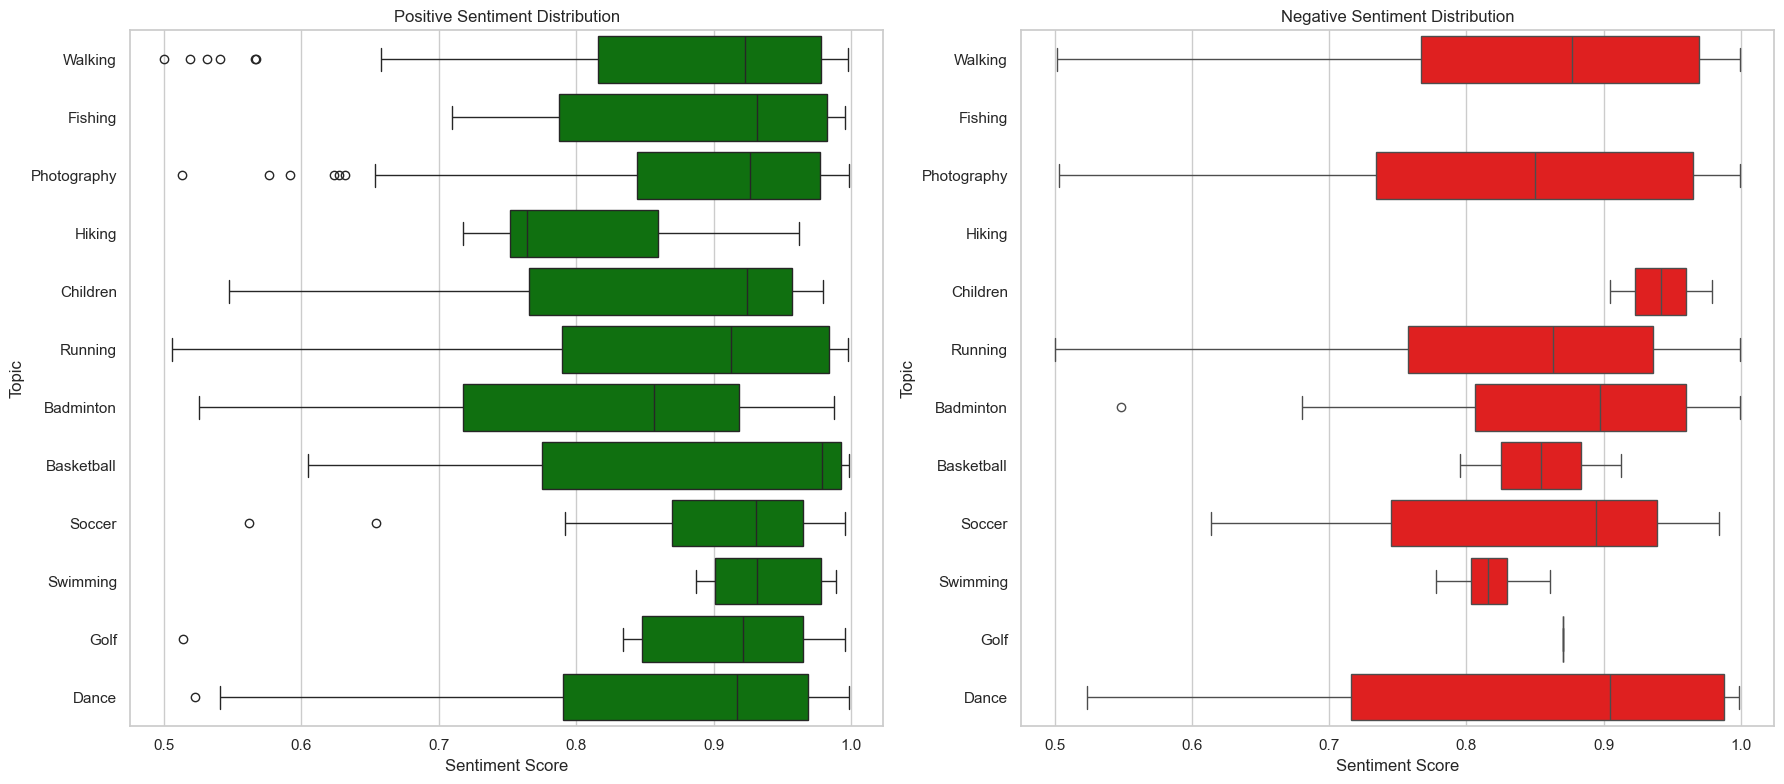

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your dataset is in a pandas DataFrame named df
# Example:
# df = pd.read_csv('your_dataset.csv')

# Set the style for the plot
sns.set(style="whitegrid")

# Filter the DataFrame for positive and negative sentiment separately
positive_sentiment_df = maindf[maindf['sentiment'] == 'POS']
negative_sentiment_df = maindf[maindf['sentiment'] == 'NEG']

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

topics_g = ['Walking', 'Fishing', 'Photography', 'Hiking', 'Children', 
          'Running', 'Badminton', 'Basketball', 'Soccer', 'Swimming', 
          'Golf', 'Dance']

# Plot for positive sentiment
sns.boxplot(ax=axes[0], x='sentimet-score', y='topic', data=positive_sentiment_df, palette=['green'], order=topics_g)
axes[0].set_title('Positive Sentiment Distribution')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Topic')

# Plot for negative sentiment
sns.boxplot(ax=axes[1], x='sentimet-score', y='topic', data=negative_sentiment_df, palette=['red'], order=topics_g)
axes[1].set_title('Negative Sentiment Distribution')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Topic')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


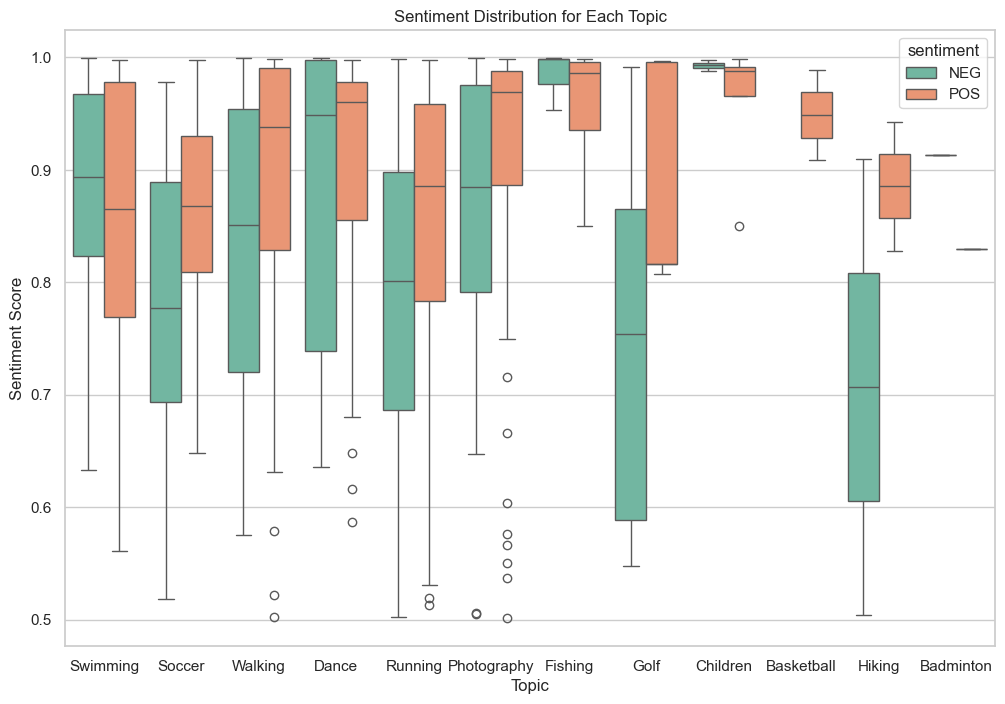

In [24]:
import seaborn as sns
# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot for each topic
plt.figure(figsize=(12, 8))
sns.boxplot(x='topic', y='sentimet-score', hue='sentiment', data=maindf, palette='Set2')

# Add title and labels
plt.title('Sentiment Distribution for Each Topic')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')

# Show the plot
plt.show()

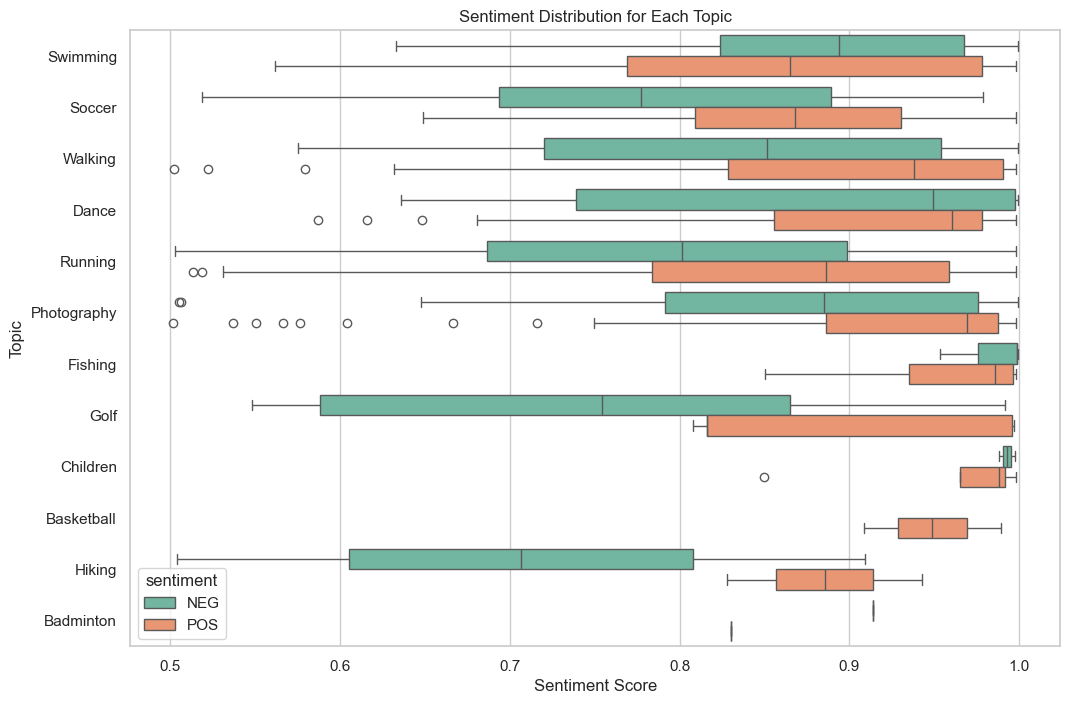

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your dataset is in a pandas DataFrame named df
# Example:
# df = pd.read_csv('your_dataset.csv')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a horizontal boxplot for each topic
plt.figure(figsize=(12, 8))
sns.boxplot(x='sentimet-score', y='topic', hue='sentiment', data=maindf, palette='Set2')

# Add title and labels
plt.title('Sentiment Distribution for Each Topic')
plt.xlabel('Sentiment Score')
plt.ylabel('Topic')

# Show the plot
plt.show()


In [10]:
pivot_table = maindf.pivot_table(index='topic', columns='sentiment', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table['POS'] + pivot_table['NEG']

In [11]:
pivot_table = maindf.pivot_table(index='topic', columns='sentiment', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table['POS'] + pivot_table['NEG']
print(pivot_table)

sentiment        NEG  POS  Total
topic                           
camping            5    3      8
cycling            0    1      1
dance              2    6      8
exercise          74  114    188
fishing            0    3      3
fitness            0    4      4
gardening         10   16     26
kids-play          1    0      1
nature            38   45     83
nature-watching   11   19     30
phtogoraphy        3    8     11
picnics           42   67    109
relaxing           1    2      3
resting            1    4      5
running            3    1      4
socialising       27   31     58
swimming           1    1      2
team-sports       93   95    188
training           5    9     14
walking           28   42     70
water-sports      55   72    127


In [63]:
# topic_cols = df.columns[1:]
numeric_df = df.drop(columns=['text'])


numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

# Assuming you have already created 'Topic' column in df
df['Topic_name'] = np.where(numeric_df.eq(1).any(axis=1), numeric_df.idxmax(axis=1), 'None')

print(df)
df['Topic_name']

                                                  text  Walking  Fishing  \
0    Walk until you drop @ Garden Bay Bridge, Marin...        1        0   
1         Walking by the beach https://t.co/yXvYUHiVbE        1        0   
2    Afternoon walk 33Â°C, and entrance of the form...        1        0   
3    Be like the river. \n\nWalking by the Singapor...        1        0   
4    Nature walk Sunday at hort park https://t.co/m...        1        0   
..                                                 ...      ...      ...   
355  If you happen to be in Tampines, come lah! â¤...        0        0   
356  Dance like nobody is watching,\nLove like you'...        0        0   
357  Today I saw one of the strangest dance. Irish ...        0        0   
358  The most scientific dance practice I have ever...        0        0   
359  My feet hurts so so much I donâ€™t wanna dance...        0        0   

     Photography  Hiking  Children  Running  Badminton  Basketball  Soccer  \
0        

0      Walking
1      Walking
2      Walking
3      Walking
4      Walking
        ...   
355      Dance
356      Dance
357      Dance
358      Dance
359      Dance
Name: Topic_name, Length: 360, dtype: object

/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_40243/368112883.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot= sns.barplot(x=topic_counts.index, y=topic_counts.values, order=topics_g, palette="viridis")


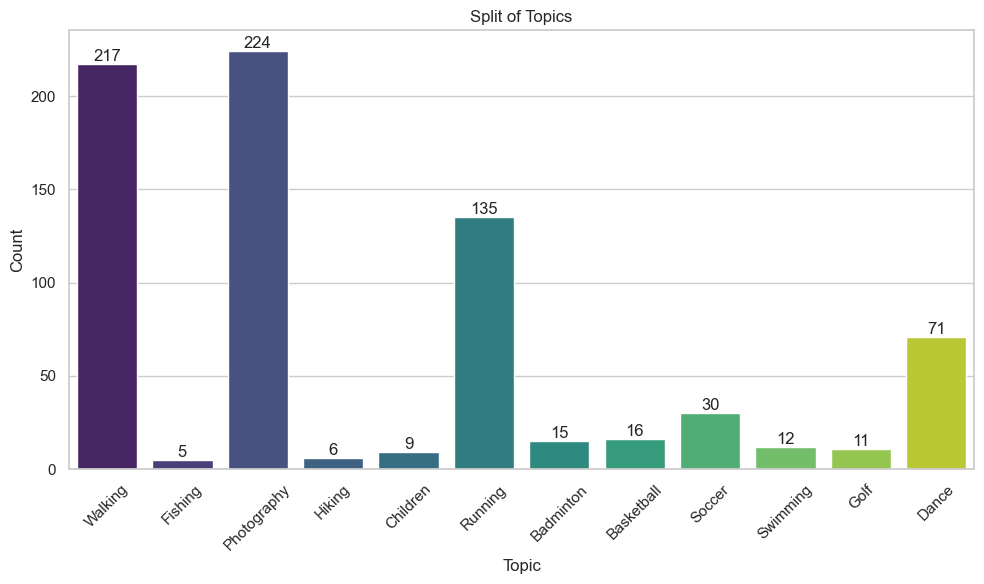

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# # Sample data
topics_g = ['Walking', 'Fishing', 'Photography', 'Hiking', 'Children', 
          'Running', 'Badminton', 'Basketball', 'Soccer', 'Swimming', 
          'Golf', 'Dance']

topic_country= pd.DataFrame({"topic": labels})
topic_counts = topic_country['topic'].value_counts()

topic_counts = topic_counts.reindex(topics_g, fill_value=0)


# Plot the bar graph
plt.figure(figsize=(10, 6))
barplot= sns.barplot(x=topic_counts.index, y=topic_counts.values, order=topics_g, palette="viridis")
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Split of Topics')
plt.xticks(rotation=45)

for index, value in enumerate(topic_counts.values):
    barplot.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

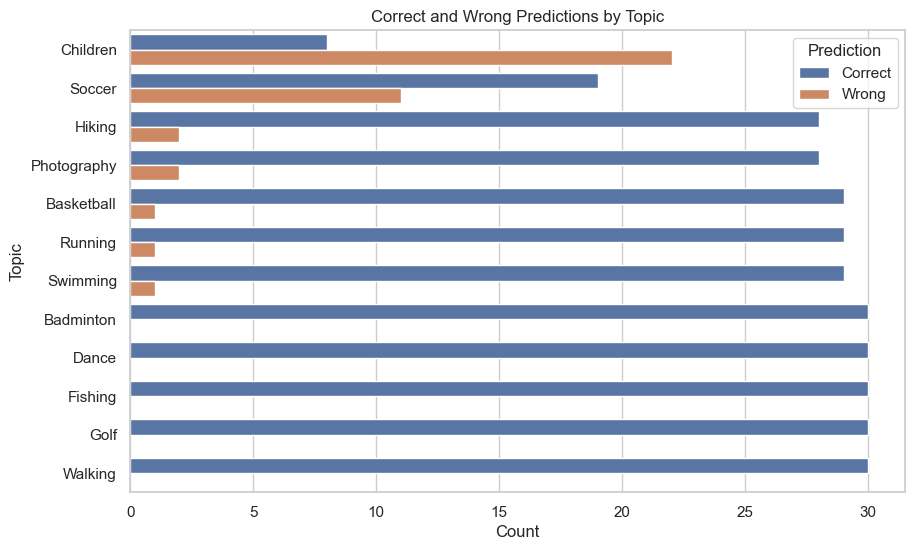

In [70]:
# rename Topic in df to topic
maindf.rename(columns={'Topic': 'topic'}, inplace=True)
topic_checkdf= maindf.join(df['Topic_name'])

topic_checkdf.head()



# Count correct and wrong predictions for each topic
topic_checkdf['Correct'] = np.where(topic_checkdf['topic'] == topic_checkdf['Topic_name'], 1, 0)
topic_checkdf['Wrong'] = np.where(topic_checkdf['topic'] != topic_checkdf['Topic_name'], 1, 0)
result = topic_checkdf.groupby('Topic_name').agg({'Correct': 'sum', 'Wrong': 'sum'}).reset_index()

# Calculate total predictions for each topic
result['Total'] = result['Correct'] + result['Wrong']

# Calculate proportion of correct predictions
result['Proportion_Correct'] = result['Correct'] / result['Total']

# Sort by proportion of correct predictions
result = result.sort_values(by='Proportion_Correct')

# Plotting
melted_df = result.melt(id_vars='Topic_name', value_vars=['Correct', 'Wrong'], var_name='Prediction', value_name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Topic_name', hue='Prediction', data=melted_df)
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Correct and Wrong Predictions by Topic')
plt.show()


In [3]:
dfhelsinki= pd.read_excel("2022_helsinki_activities_labelled.xlsx")
dfmelb= pd.read_excel("2022_melbourne_activities_labelled.xlsx")
dfnewyork= pd.read_excel("2022_newyork_activities_labelled.xlsx")
dfportland= pd.read_excel("2022_portland_activities_labelled.xlsx")
dfportland=dfportland.head(1000)
dfsingapore= pd.read_excel("2022_singapore_activities_labelled.xlsx")
dftokyo= pd.read_excel("2022_tokyo_activities_labelled.xlsx")


dfcombined= pd.concat([dfhelsinki, dfmelb, dfnewyork, dfportland, dfsingapore, dftokyo])

print(len(dfcombined))
dfcombined.head()




5376


context_annotations            author_id  \
0  [{'domain': {'id': '29', 'name': 'Events [Enti...  1548271167139559936   
1  [{'domain': {'id': '46', 'name': 'Business Tax...           2269063832   
2  [{'domain': {'id': '46', 'name': 'Business Tax...           2269063832   
3  [{'domain': {'id': '46', 'name': 'Business Tax...             45404039   
4  [{'domain': {'id': '46', 'name': 'Business Tax...           2269063832   

                                            entities   edit_history_tweet_ids  \
0  {'urls': [{'start': 266, 'end': 289, 'url': 'h...  ['1609073302466609152']   
1  {'annotations': [{'start': 76, 'end': 81, 'pro...  ['1608794679021035525']   
2  {'annotations': [{'start': 76, 'end': 81, 'pro...  ['1608793722585600000']   
3  {'annotations': [{'start': 122, 'end': 129, 'p...  ['1608526759204425728']   
4  {'annotations': [{'start': 47, 'end': 52, 'pro...  ['1608425441307639810']   

                    id                                               text  \
0  1609073302466599936  My secret garden\nHappy New Year 2023\n\n#natu...   
1  1608794679021029888  Workout of the day:\n\n35min, running (2.72km)...   
2  1608793722585600000  Workout of the day:\n\n35min, running (2.72km)...   
3  1608526759204420096  Food for thought regarding the GOAT debate. Su...   
4  1608425441307630080  Workout of the day:\n\n25min, running (1.28km)...   

                                geo                created_at lang sentiment  \
0  {'place_id': '5ef832bb704339b0'}  2022-12-31T06:25:45.000Z   en       NEG   
1  {'place_id': '5ef832bb704339b0'}  2022-12-30T11:58:36.000Z   en       POS   
2  {'place_id': '5ef832bb704339b0'}  2022-12-30T11:54:48.000Z   en       POS   
3  {'place_id': '5ef832bb704339b0'}  2022-12-29T18:13:59.000Z   en       POS   
4  {'place_id': '5ef832bb704339b0'}  2022-12-29T11:31:22.000Z   en       POS   

   sentimet-score        topic withheld  
0        0.918937  Photography      NaN  
1        0.800162      Running      NaN  
2        0.914428      Running      NaN  
3        0.974116  Photography      NaN  
4        0.856997      Running      NaN

In [4]:
print(len(dfhelsinki), len(dfmelb), len(dfnewyork), len(dfportland), len(dfsingapore), len(dftokyo) )

376 1000 1000 1000 1000 1000


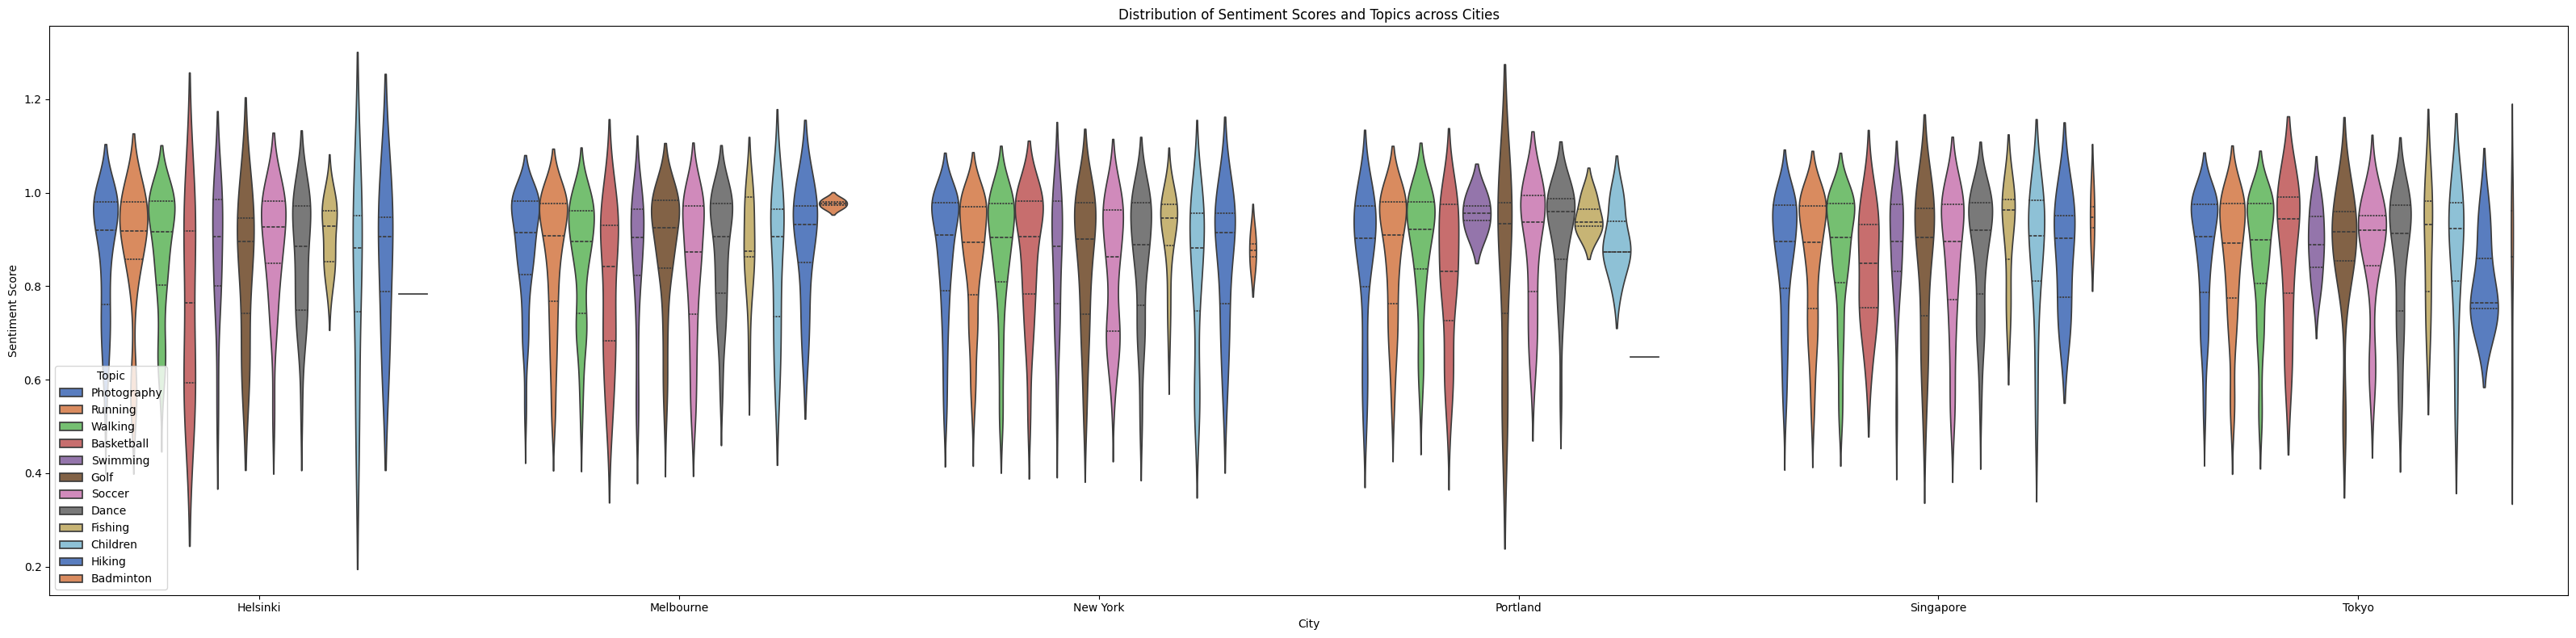

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Let's assume your concatenated DataFrame is named 'df'
city_mapping = {
    range(0, 376): 'Helsinki',
    range(376, 1376): 'Melbourne',
    range(1376, 2376): 'New York',
    range(2376, 3376): 'Portland',
    range(3376, 4376): 'Singapore',
    range(4376, 5376): 'Tokyo'
}

# Create a new column 'city' based on the mapping
dfcombined.reset_index(drop=True, inplace=True)

dfcombined['city'] = [city for idx in dfcombined.index for city_range, city in city_mapping.items() if idx in city_range]





plt.figure(figsize=(32, 8))  # Adjusting the dimensions to make it super long
sns.violinplot(data=dfcombined, x='city', y='sentimet-score', hue='topic', split=False, inner="quart", palette="muted")
plt.title('Distribution of Sentiment Scores and Topics across Cities')
plt.xlabel('City')
plt.ylabel('Sentiment Score')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()








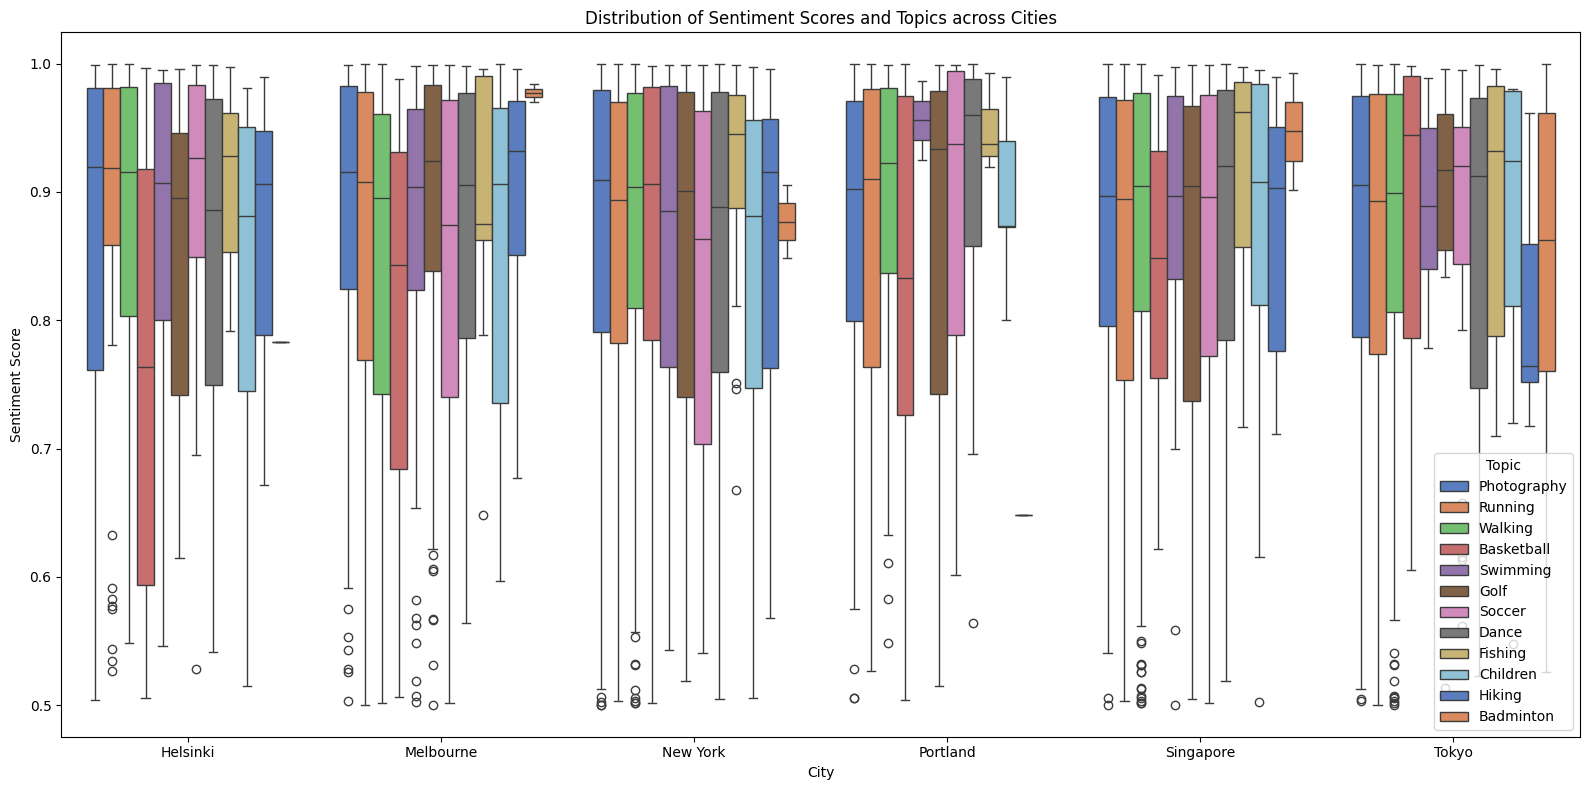

In [25]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=dfcombined, x='city', y='sentimet-score', hue='topic', palette="muted")
plt.title('Distribution of Sentiment Scores and Topics across Cities')
plt.xlabel('City')
plt.ylabel('Sentiment Score')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


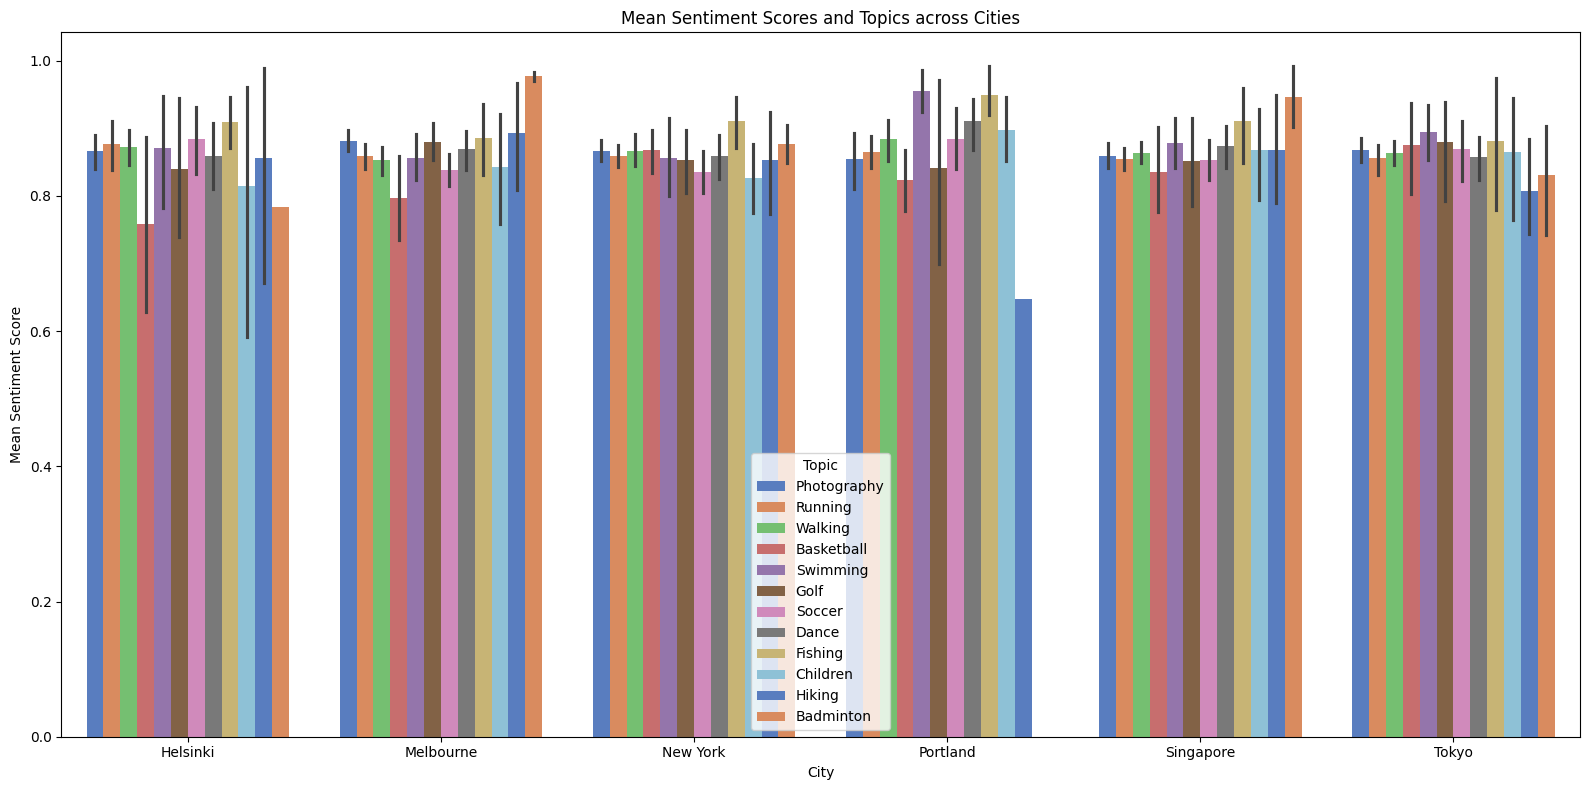

In [27]:
plt.figure(figsize=(16, 8))
sns.barplot(data=dfcombined, x='city', y='sentimet-score', hue='topic', palette="muted")
plt.title('Mean Sentiment Scores and Topics across Cities')
plt.xlabel('City')
plt.ylabel('Mean Sentiment Score')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jyotit-kaushal/minicond

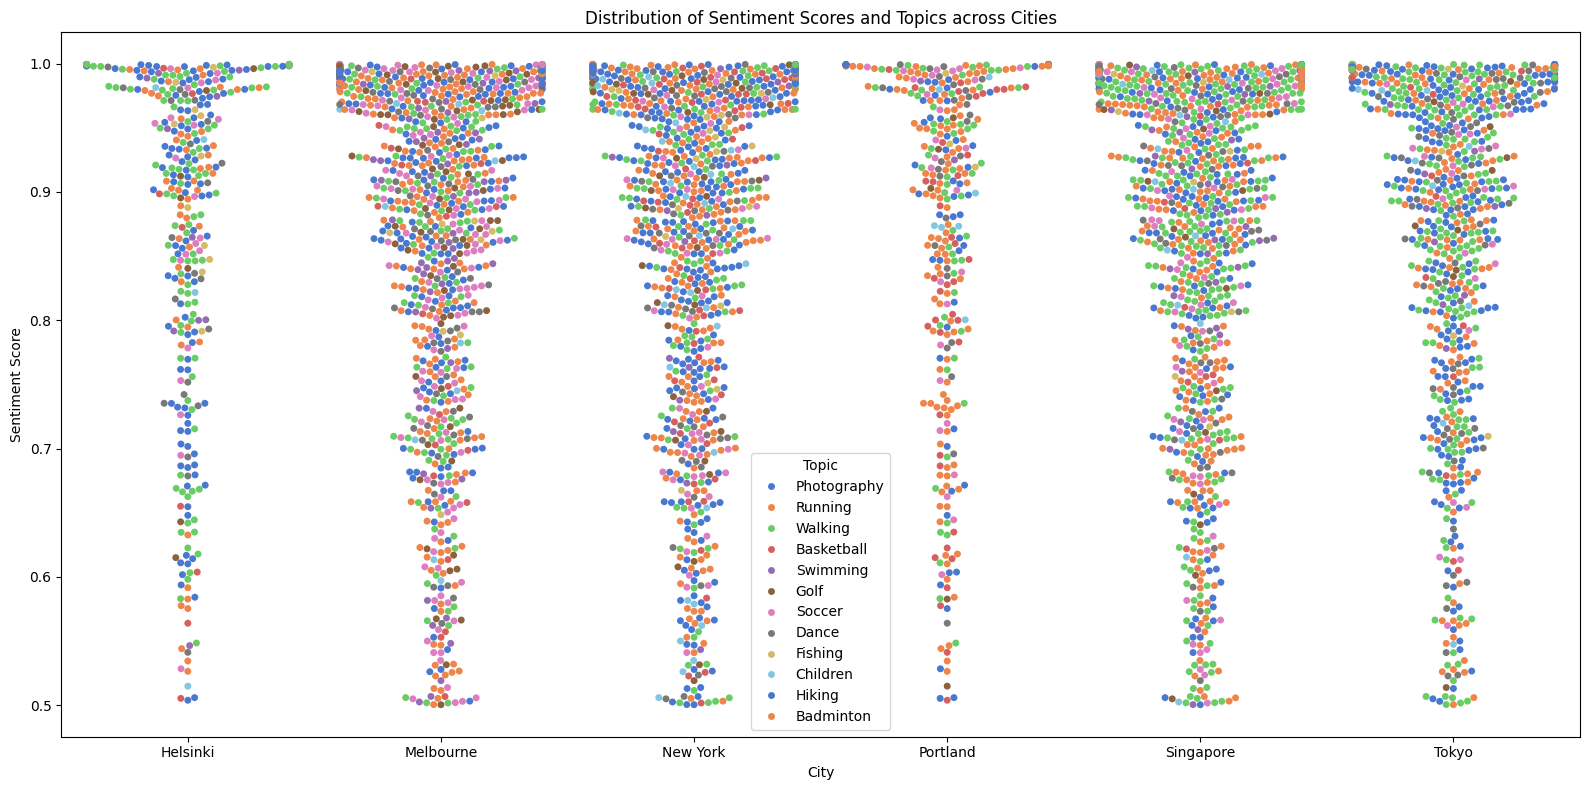

In [30]:
plt.figure(figsize=(16, 8))
sns.swarmplot(data=dfcombined, x='city', y='sentimet-score', hue='topic', palette="muted")
plt.title('Distribution of Sentiment Scores and Topics across Cities')
plt.xlabel('City')
plt.ylabel('Sentiment Score')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()



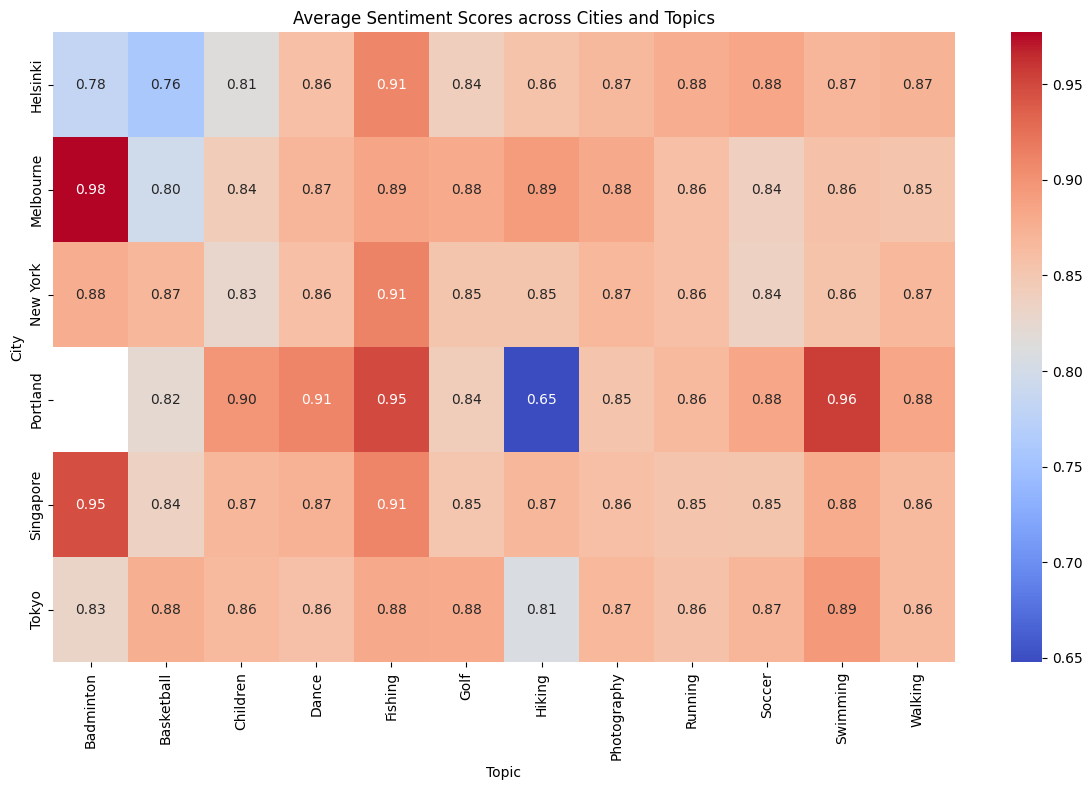

In [34]:
pivot_table = dfcombined.pivot_table(index='city', columns='topic', values='sentimet-score', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(data=pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Sentiment Scores across Cities and Topics')
plt.xlabel('Topic')
plt.ylabel('City')
plt.tight_layout()
plt.show()



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

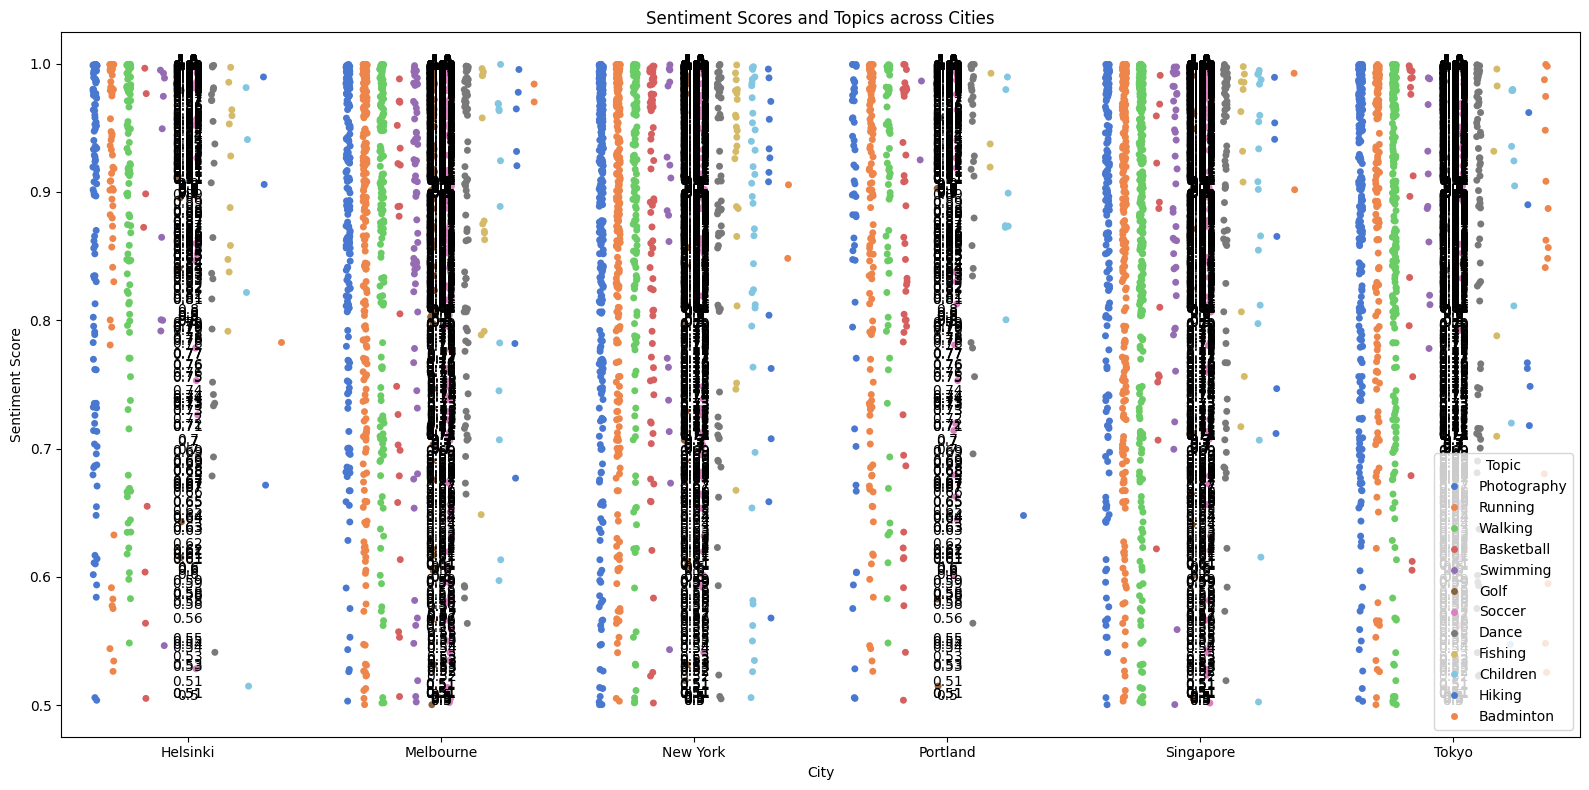

In [35]:
plt.figure(figsize=(16, 8))
sns.barplot(data=dfcombined, x='city', y='sentimet-score', hue='topic', palette="muted")
for p in plt.gca().patches:
    plt.gca().annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Mean Sentiment Scores and Topics across Cities')
plt.xlabel('City')
plt.ylabel('Mean Sentiment Score')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


In [16]:
dfcombined.to_excel('combined_labelled_dataset.xlsx')

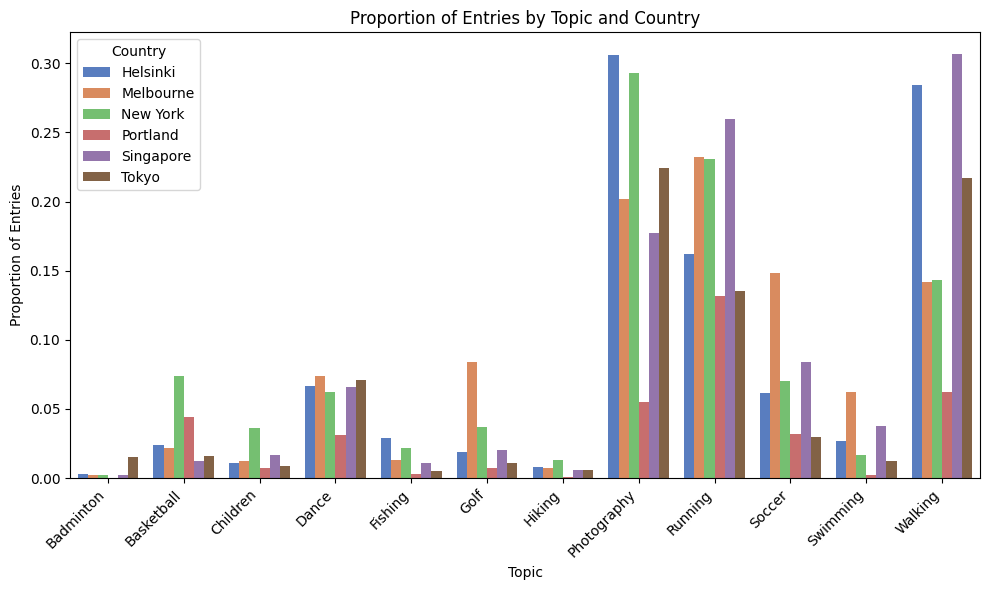

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Count the number of entries for each city
city_counts = dfcombined['city'].value_counts()

# Calculate the proportion of entries for each topic in each city
topic_proportions = dfcombined.groupby(['city', 'topic']).size() / city_counts

# Reset the index to convert the multi-index series to a DataFrame
topic_proportions = topic_proportions.reset_index(name='proportion')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_proportions, x='topic', y='proportion', hue='city', palette="muted")
plt.title('Proportion of Entries by Topic and Country')
plt.xlabel('Topic')
plt.ylabel('Proportion of Entries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


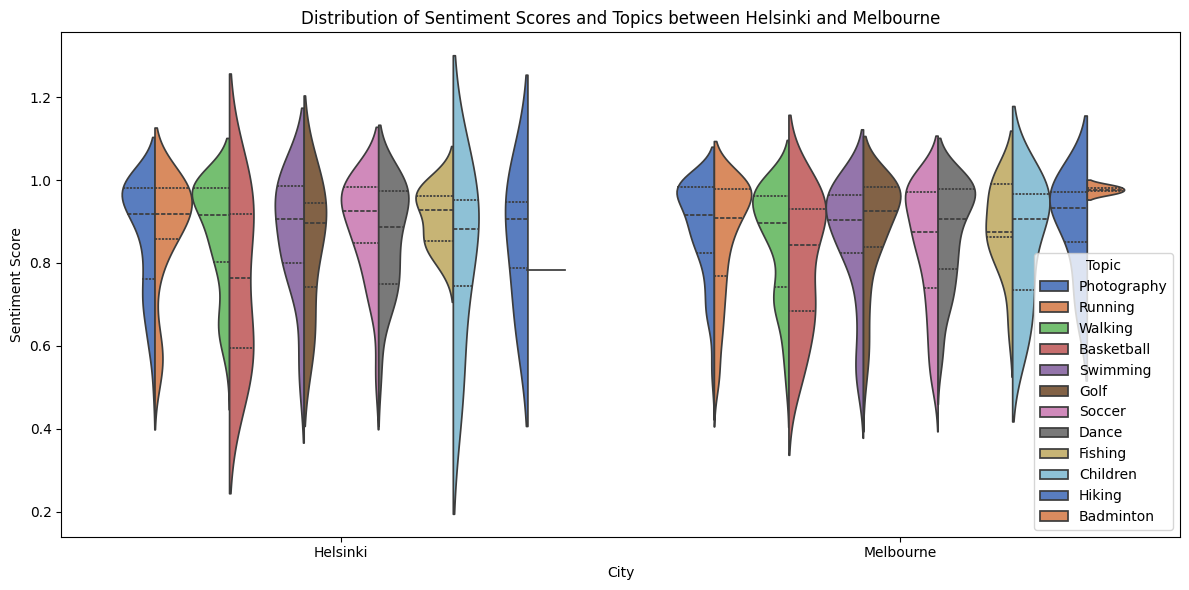

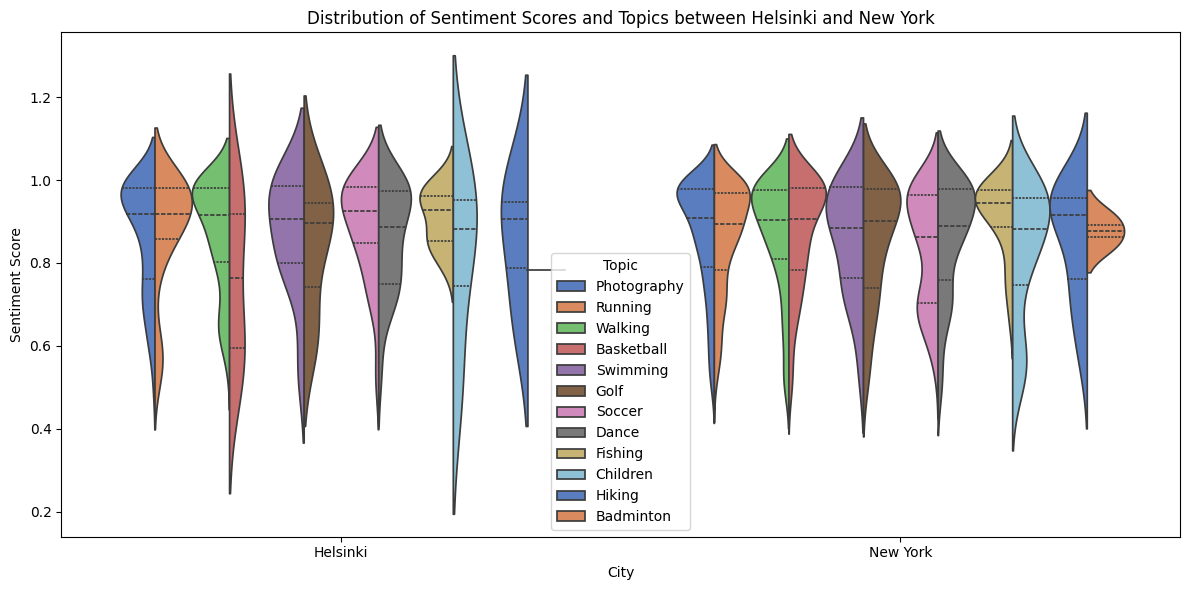

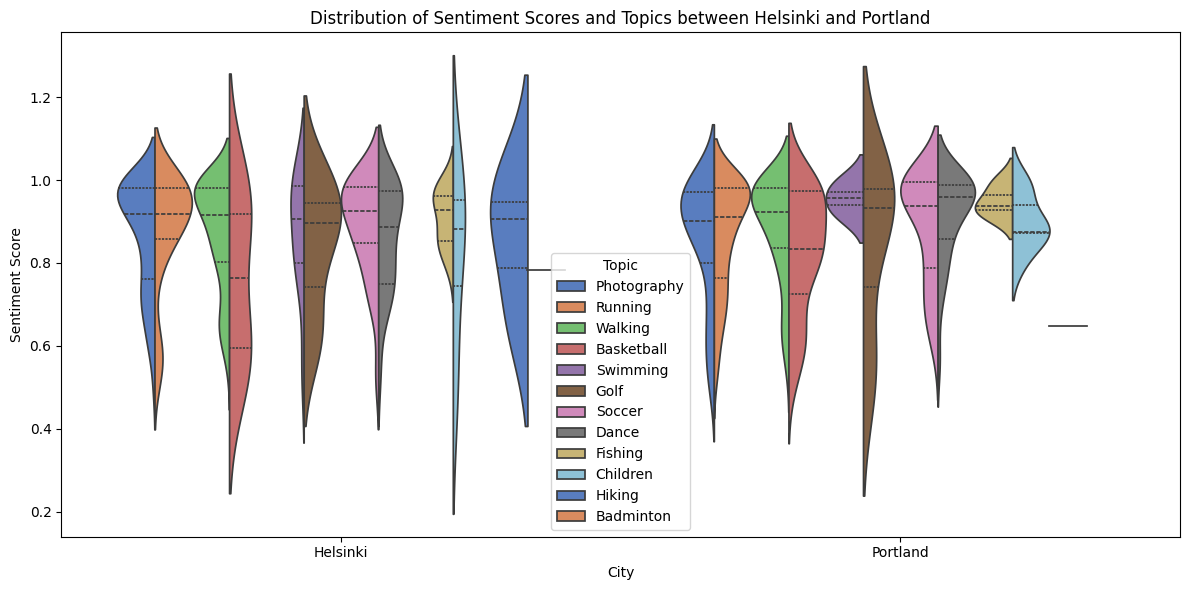

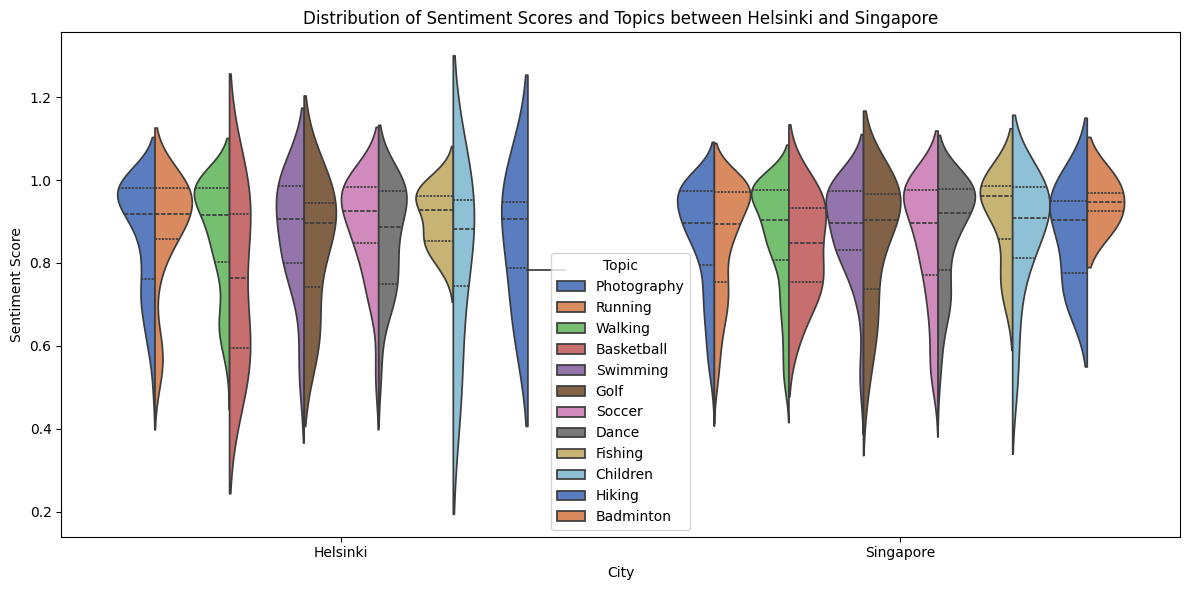

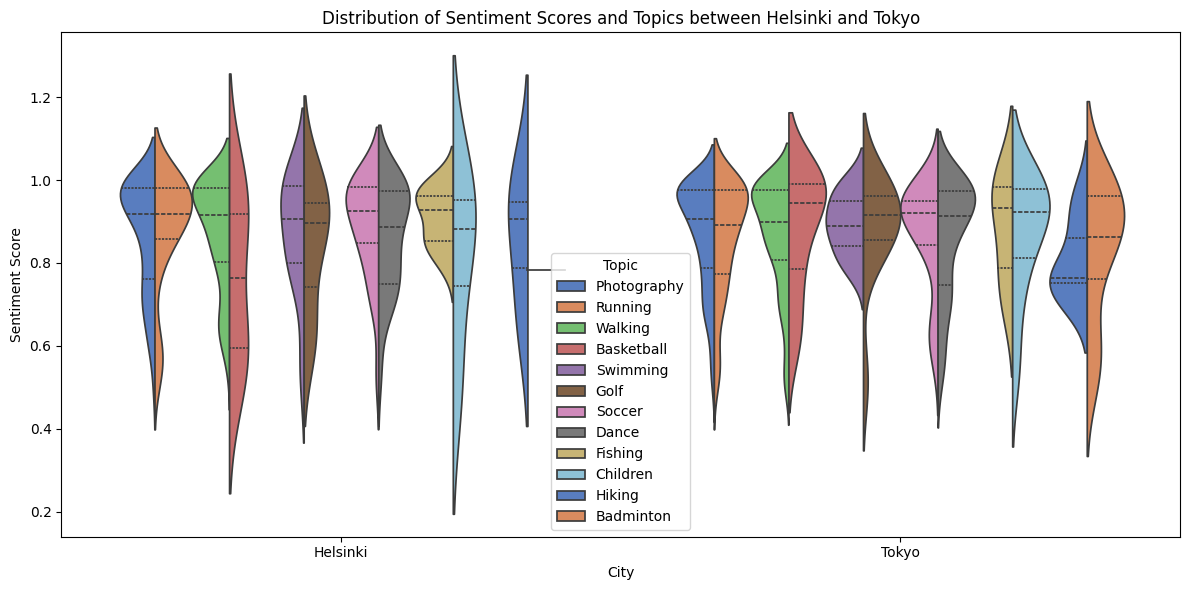

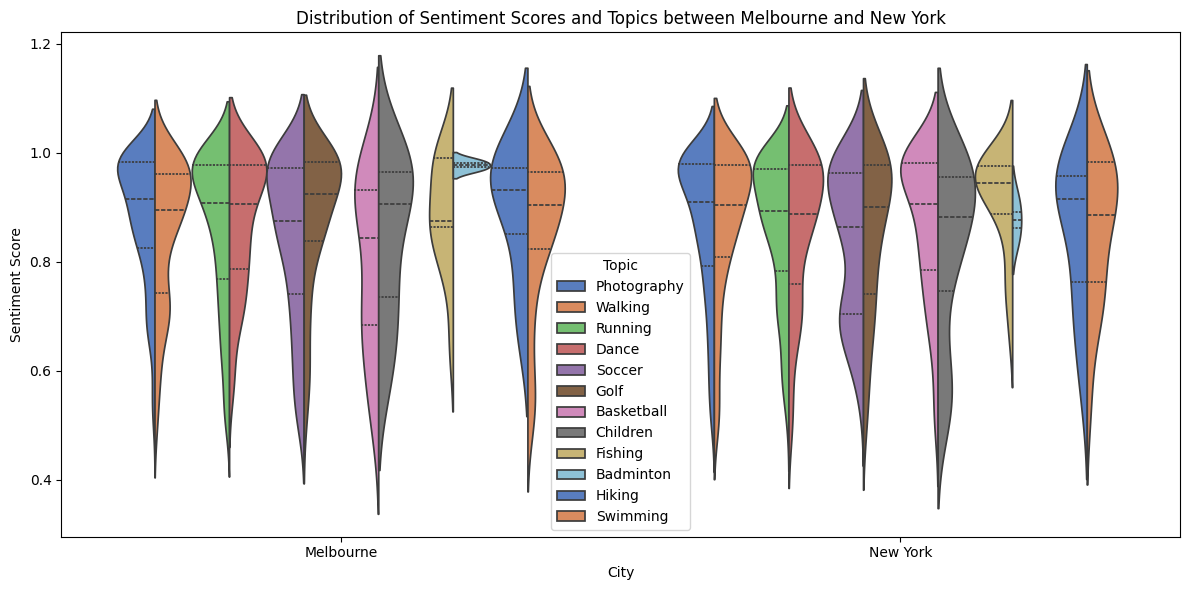

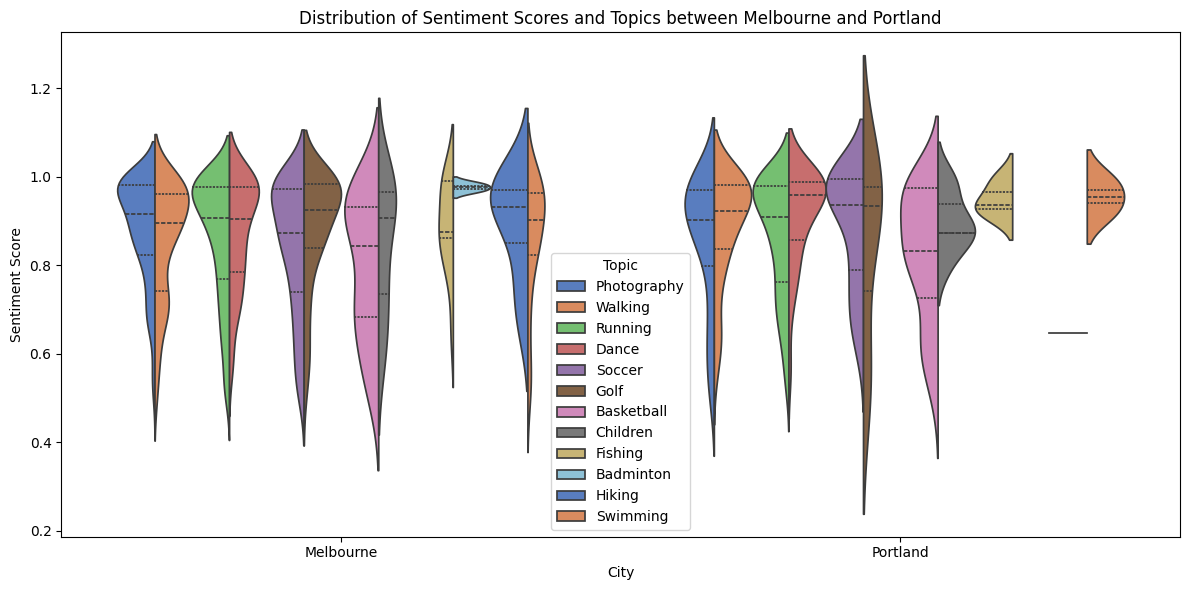

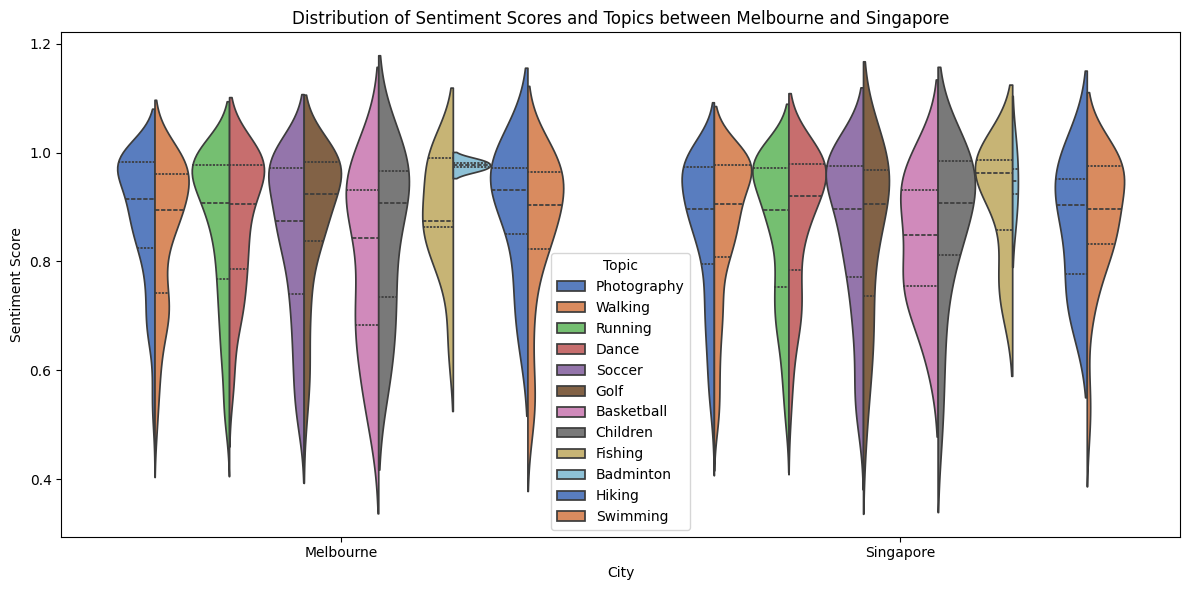

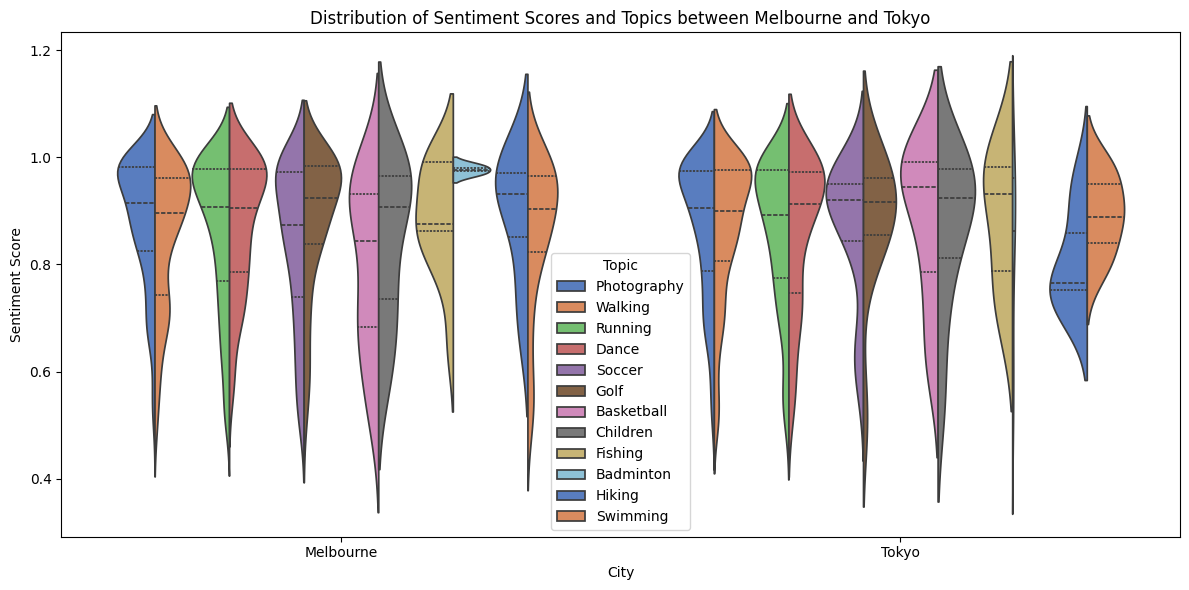

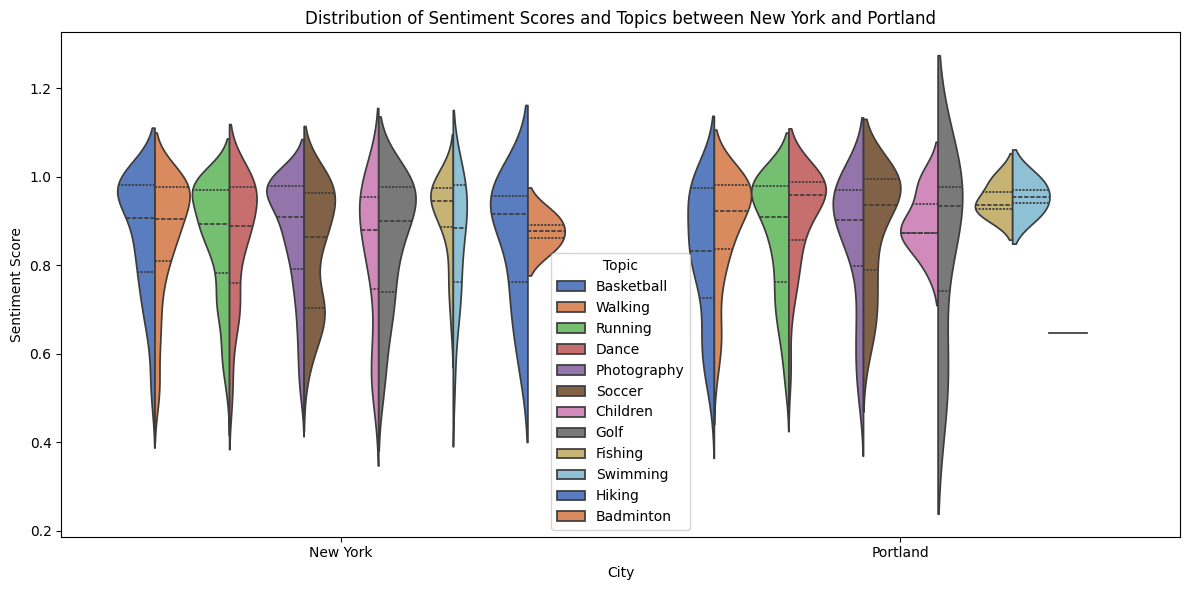

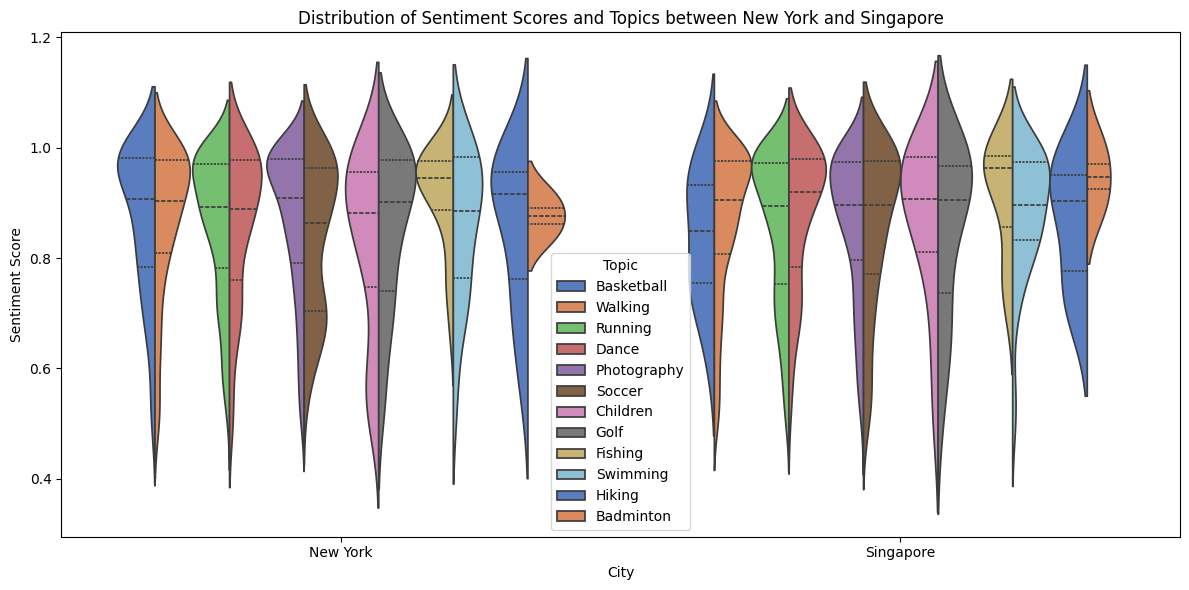

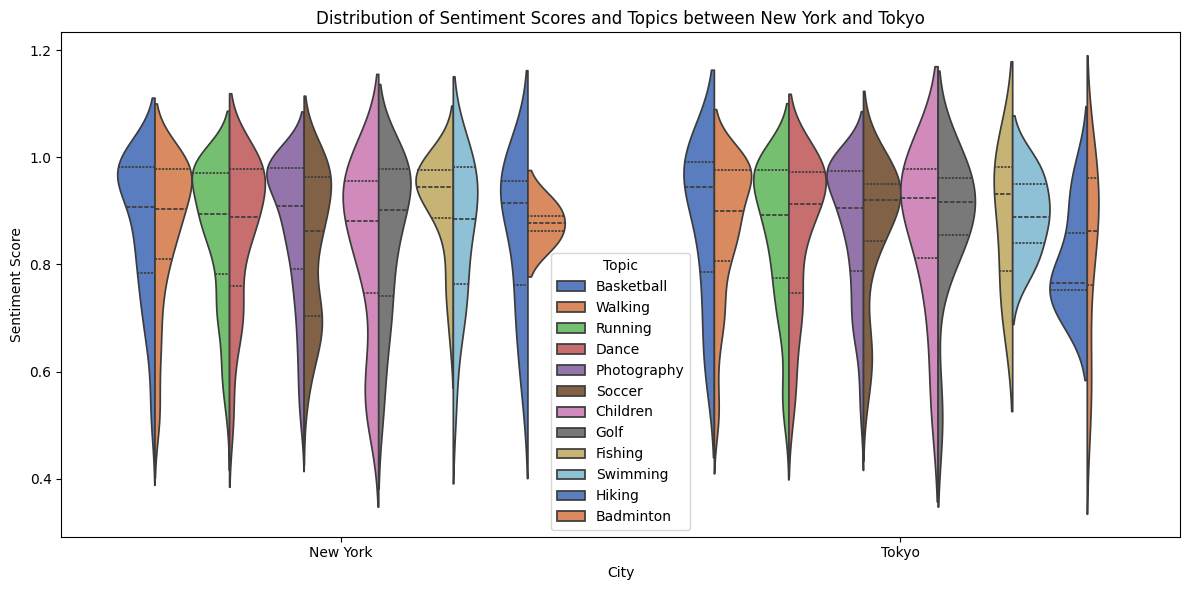

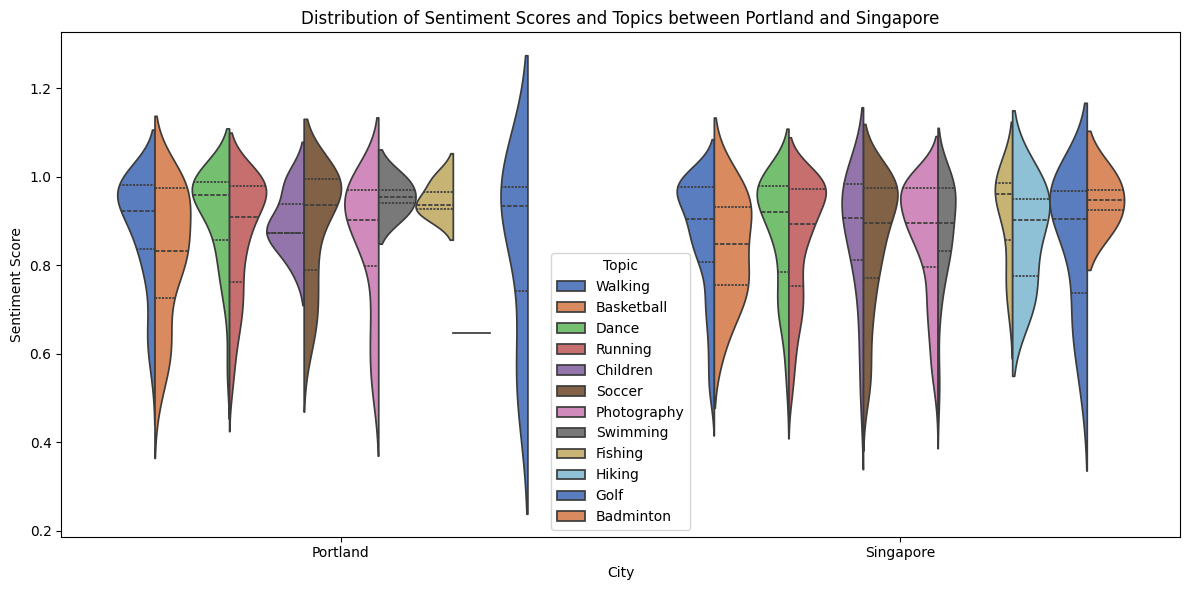

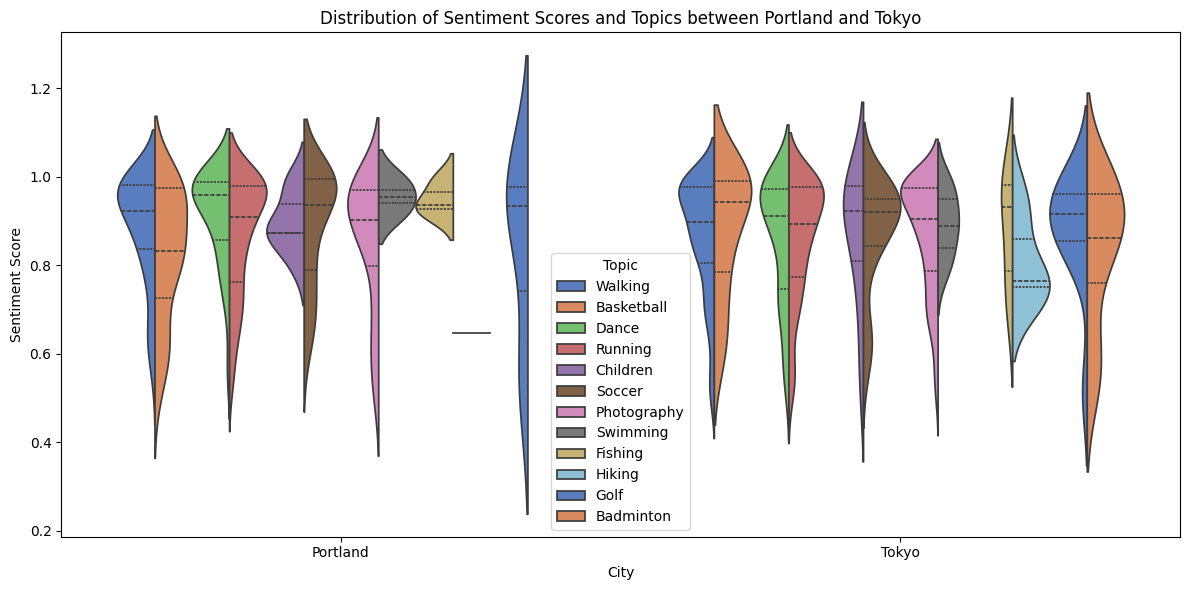

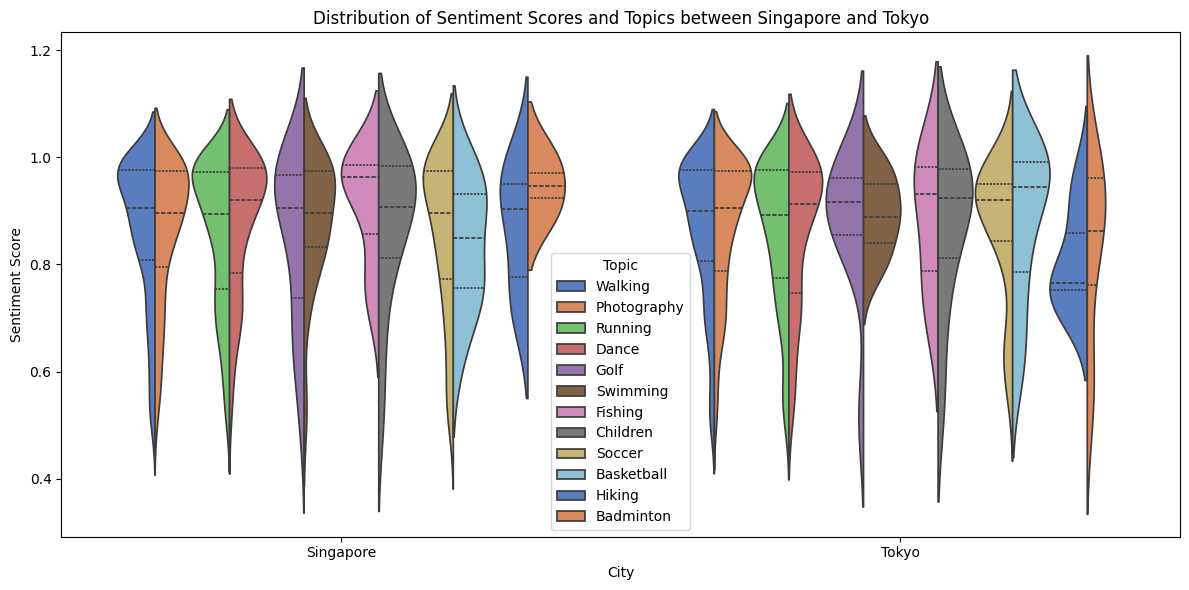

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your concatenated DataFrame is named 'dfcombined'
city_mapping = {
    range(0, 376): 'Helsinki',
    range(376, 1376): 'Melbourne',
    range(1376, 2376): 'New York',
    range(2376, 3376): 'Portland',
    range(3376, 4376): 'Singapore',
    range(4376, 5376): 'Tokyo'
}

# Create a new column 'city' based on the mapping
dfcombined.reset_index(drop=True, inplace=True)
dfcombined['city'] = [city for idx in dfcombined.index for city_range, city in city_mapping.items() if idx in city_range]

# Create pairwise violin plots
cities = list(city_mapping.values())
pairs = [(cities[i], cities[j]) for i in range(len(cities)) for j in range(i+1, len(cities))]

for pair in pairs:
    city1, city2 = pair
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=dfcombined[dfcombined['city'].isin([city1, city2])], x='city', y='sentimet-score', hue='topic', split=True, inner="quart", palette="muted")
    plt.title(f'Distribution of Sentiment Scores and Topics between {city1} and {city2}')
    plt.xlabel('City')
    plt.ylabel('Sentiment Score')
    plt.legend(title='Topic')
    plt.tight_layout()
    plt.show()


In [27]:
dfcombined.head()

context_annotations            author_id  \
0  [{'domain': {'id': '29', 'name': 'Events [Enti...  1548271167139559936   
1  [{'domain': {'id': '46', 'name': 'Business Tax...           2269063832   
2  [{'domain': {'id': '46', 'name': 'Business Tax...           2269063832   
3  [{'domain': {'id': '46', 'name': 'Business Tax...             45404039   
4  [{'domain': {'id': '46', 'name': 'Business Tax...           2269063832   

                                            entities   edit_history_tweet_ids  \
0  {'urls': [{'start': 266, 'end': 289, 'url': 'h...  ['1609073302466609152']   
1  {'annotations': [{'start': 76, 'end': 81, 'pro...  ['1608794679021035525']   
2  {'annotations': [{'start': 76, 'end': 81, 'pro...  ['1608793722585600000']   
3  {'annotations': [{'start': 122, 'end': 129, 'p...  ['1608526759204425728']   
4  {'annotations': [{'start': 47, 'end': 52, 'pro...  ['1608425441307639810']   

                    id                                               text  \
0  1609073302466599936  My secret garden\nHappy New Year 2023\n\n#natu...   
1  1608794679021029888  Workout of the day:\n\n35min, running (2.72km)...   
2  1608793722585600000  Workout of the day:\n\n35min, running (2.72km)...   
3  1608526759204420096  Food for thought regarding the GOAT debate. Su...   
4  1608425441307630080  Workout of the day:\n\n25min, running (1.28km)...   

                                geo                created_at lang sentiment  \
0  {'place_id': '5ef832bb704339b0'}  2022-12-31T06:25:45.000Z   en       NEG   
1  {'place_id': '5ef832bb704339b0'}  2022-12-30T11:58:36.000Z   en       POS   
2  {'place_id': '5ef832bb704339b0'}  2022-12-30T11:54:48.000Z   en       POS   
3  {'place_id': '5ef832bb704339b0'}  2022-12-29T18:13:59.000Z   en       POS   
4  {'place_id': '5ef832bb704339b0'}  2022-12-29T11:31:22.000Z   en       POS   

   sentimet-score        topic withheld      city  
0        0.918937  Photography      NaN  Helsinki  
1        0.800162      Running      NaN  Helsinki  
2        0.914428      Running      NaN  Helsinki  
3        0.974116  Photography      NaN  Helsinki  
4        0.856997      Running      NaN  Helsinki